In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,Embedding, Flatten, Bidirectional, SimpleRNN, LSTM, GRU

import warnings
warnings.filterwarnings("ignore")

In [ ]:
food_rev=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL-NLP/food_review.csv")

In [ ]:
food_rev.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [ ]:
food_rev.shape

(40500, 3)

In [ ]:
food_rev.Score.max()

5

In [ ]:
food_rev.Score.min()

1

In [ ]:
food_rev['Score'].value_counts(sort=False)

1    8079
2    8095
3    8103
4    8117
5    8106
Name: Score, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(food_rev['Score'])
food_rev['Score']=le.transform(food_rev['Score'])

In [ ]:
food_rev['Score'].value_counts(sort=False)

0    8079
1    8095
2    8103
3    8117
4    8106
Name: Score, dtype: int64

In [ ]:
from wordcloud import WordCloud

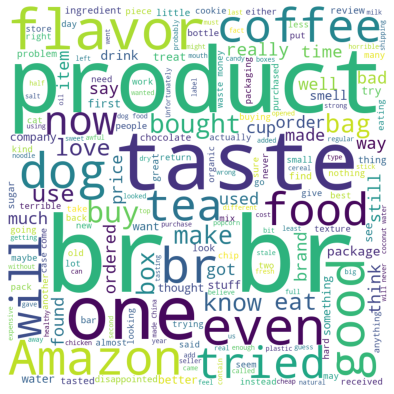

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc.generate(''.join(food_rev[food_rev["Score"]==0]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

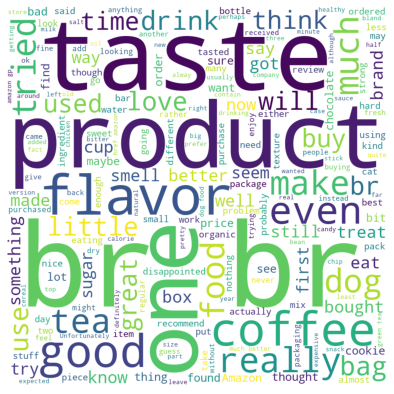

In [ ]:
wc1 = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)
wc1.generate(''.join(food_rev[food_rev["Score"]==1]["Text"]))
plt.figure(figsize = (7,7)) 
plt.imshow(wc1) 
plt.axis("off") 
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
food_rev['Text'].head()

0    I bought these from a large chain pet store. a...
1    This soup is incredibly good!  But honestly, I...
2    Our family loves these tasty and healthy sesam...
3    The local auto shop offers this free to it cus...
4    I brought 2 bottles.  One I carry in my pocket...
Name: Text, dtype: object

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
stop=stopwords.words('english')

In [ ]:
html_tag_words=['br']

In [ ]:
stop_words=stop+html_tag_words

In [ ]:
def decontract(Text):
    Text = re.sub(r"won\'t", "will not", Text)
    Text = re.sub(r"can\'t", "can not", Text)
    Text = re.sub(r"didn\'t", "did not", Text)
    Text = re.sub(r"n\'t", " not", Text)
    Text = re.sub(r"\'re", " are", Text)
    Text = re.sub(r"\'s", " is", Text)
    Text = re.sub(r"\'d", " would", Text)
    Text = re.sub(r"\'ll", " will", Text)
    Text = re.sub(r"\'t", " not", Text)
    Text = re.sub(r"\'ve", " have", Text)
    Text = re.sub(r"\'m", " am", Text)
    return Text

In [ ]:
def clean(review):
    review = re.sub(r"http\S+", "", review)             # removing website links
    review = BeautifulSoup(review, 'lxml').get_text()   # removing html tags
    review = decontract(review)                         # decontracting
    review = re.sub("\S*\d\S*", "", review).strip()     # removing the words with numeric digits
    review = re.sub('[^A-Za-z]+', ' ', review)          # removing non-word characters
    review = review.lower()                             # converting to lower case
    review = [word for word in review.split(" ") if not word in stop_words] # removing stop words
    review = [lemmatizer.lemmatize(token, "v") for token in review] #Lemmatization
    review = " ".join(review)
    review.strip()
    return review

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
food_rev['Text'] = food_rev['Text'].apply(clean)

In [ ]:
food_rev['Text'].head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [ ]:
x = food_rev["Text"]
y = food_rev["Score"]

In [ ]:
x.head(10)

0    buy large chain pet store read review check ba...
1    soup incredibly good honestly look better deal...
2    family love tasty healthy sesame honey almonds...
3    local auto shop offer free customers try twice...
4    bring bottle one carry pocket home fell love v...
5    recommend product relative mine must say feel ...
6                           blunt would call orangina 
7    stuff suck let explain clump nice easy keep li...
8    add slice saute veggies onions make delcious a...
9    pamela make awesome delicious easy use wheatfr...
Name: Text, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)

In [ ]:
doc_length = []
for doc in train_sequences:
  doc_length.append(len(doc))
max(doc_length)

925

In [ ]:
np.quantile(doc_length,0.95)

111.0

In [ ]:
max_length = 111

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length)
print(train_padded)

[[   0    0    0 ...  634 1037   60]
 [   0    0    0 ...   96  515  837]
 [   0    0    0 ... 1091  457  258]
 ...
 [   0    0    0 ...   27 1498  938]
 [   0    0    0 ...   74  795  178]
 [   0    0    0 ...  107 1879  180]]


In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
vocab_len = len(tokenizer.index_word)+1

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.metrics import classification_report

**GRU**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_len,100, input_length=max_length, mask_zero=True))
model.add(GRU(16, activation="tanh", return_sequences=True))
model.add(GRU(14, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 111, 100)          2781200   
_________________________________________________________________
gru (GRU)                    (None, 111, 16)           5664      
_________________________________________________________________
gru_1 (GRU)                  (None, 14)                1344      
_________________________________________________________________
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 2,788,583
Trainable params: 2,788,583
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [ ]:
model.fit(train_padded,y_train,epochs=50,batch_size=128)

Epoch 1/50
254/254 [==============================] - 56s 199ms/step - loss: 1.4611
Epoch 2/50
254/254 [==============================] - 50s 195ms/step - loss: 1.1289
Epoch 3/50
254/254 [==============================] - 49s 193ms/step - loss: 0.9675
Epoch 4/50
254/254 [==============================] - 51s 200ms/step - loss: 0.8484
Epoch 5/50
254/254 [==============================] - 51s 199ms/step - loss: 0.7391
Epoch 6/50
254/254 [==============================] - 49s 194ms/step - loss: 0.6357
Epoch 7/50
254/254 [==============================] - 50s 197ms/step - loss: 0.5490
Epoch 8/50
254/254 [==============================] - 49s 192ms/step - loss: 0.4688
Epoch 9/50
254/254 [==============================] - 50s 195ms/step - loss: 0.4074
Epoch 10/50
254/254 [==============================] - 50s 198ms/step - loss: 0.3501
Epoch 11/50
254/254 [==============================] - 50s 199ms/step - loss: 0.3065
Epoch 12/50
254/254 [==============================] - 50s 197ms/step - lo

In [ ]:
y_pred=model.predict(test_padded)
y_pred=y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1613
           1       0.44      0.47      0.45      1575
           2       0.42      0.47      0.44      1683
           3       0.43      0.45      0.44      1609
           4       0.62      0.51      0.56      1620

    accuracy                           0.48      8100
   macro avg       0.49      0.48      0.49      8100
weighted avg       0.49      0.48      0.49      8100



**Bi-Directional GRU**

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_len,100, input_length=max_length, mask_zero=True))
model2.add(Bidirectional(GRU(16, activation="tanh", return_sequences=True)))
model2.add(Bidirectional(GRU(14, activation="relu")))
model2.add(Dense(14, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(5,activation="softmax"))

In [ ]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

In [ ]:
model2.fit(train_padded,y_train,epochs=50,batch_size=128)

Epoch 1/50
254/254 [==============================] - 91s 316ms/step - loss: 1.4066
Epoch 2/50
254/254 [==============================] - 82s 323ms/step - loss: 1.1035
Epoch 3/50
254/254 [==============================] - 82s 321ms/step - loss: 0.9125
Epoch 4/50
254/254 [==============================] - 80s 316ms/step - loss: 0.7595
Epoch 5/50
254/254 [==============================] - 82s 321ms/step - loss: 0.6242
Epoch 6/50
254/254 [==============================] - 81s 318ms/step - loss: 0.5183
Epoch 7/50
254/254 [==============================] - 81s 321ms/step - loss: 0.4319
Epoch 8/50
254/254 [==============================] - 82s 322ms/step - loss: 0.3620
Epoch 9/50
254/254 [==============================] - 82s 322ms/step - loss: 0.3132
Epoch 10/50
254/254 [==============================] - 81s 320ms/step - loss: 0.2706
Epoch 11/50
254/254 [==============================] - 81s 319ms/step - loss: 0.2305
Epoch 12/50
254/254 [==============================] - 80s 316ms/step - lo

In [ ]:
y_pred=model2.predict(test_padded)
y_pred=y_pred.argmax(axis=1)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.52      0.57      1613
           1       0.44      0.50      0.47      1575
           2       0.45      0.46      0.46      1683
           3       0.42      0.47      0.44      1609
           4       0.59      0.51      0.55      1620

    accuracy                           0.49      8100
   macro avg       0.50      0.49      0.50      8100
weighted avg       0.50      0.49      0.50      8100

